In [1]:
import pandas as pd
import sklearn

In [2]:
data_path = "C:\\Users\\LENOVO\\Desktop\\python file\\pranawa\\data\\lr-Real-estate_557b3617-37d5-4753-a00b-efd475d25c04.csv"


In [3]:
import os 
os.path.exists(data_path)

True

In [4]:
df= pd.read_csv(data_path)
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [5]:
# we have to find the y house price of unit area which will be the level and other data will be the input features 
# no, transaction data doesn't effect the house price of unit area so we will remove it 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
df=df.drop(['No','X1 transaction date'], axis=1)
df.head(2)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
#df=df.drop_duplicates()


#### Visualization

In [11]:
import matplotlib.pyplot as plt
import numpy as np

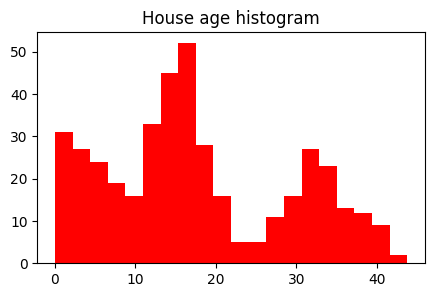

In [12]:
plt.figure(figsize=(5,3))
plt.hist(
    df['X2 house age'],
    bins=20,color='red'
)
plt.title("House age histogram")
plt.show()


c:\Users\LENOVO\Desktop\python file\pranawa\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


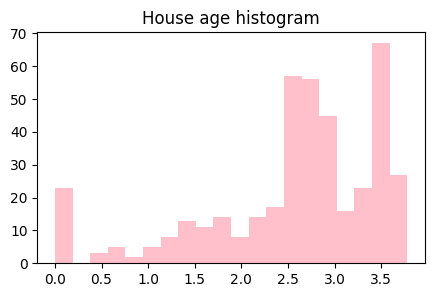

In [13]:
plt.figure(figsize=(5,3))
plt.hist(
   np.where(df['X2 house age']!=0,
            np.log(df['X2 house age']),
            df['X2 house age']),
    bins=20,color='pink'
)
plt.title("House age histogram")
plt.show()

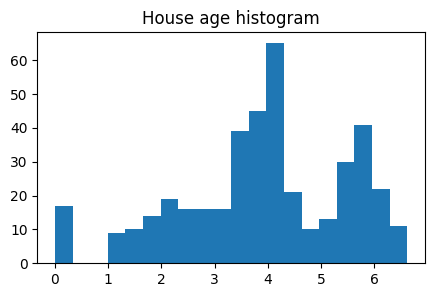

In [14]:
plt.figure(figsize=(5,3))
plt.hist(
   np.where(df['X2 house age']!=0,
            np.sqrt(df['X2 house age']),
            df['X2 house age']),
    bins=20
)
plt.title("House age histogram")
plt.show()

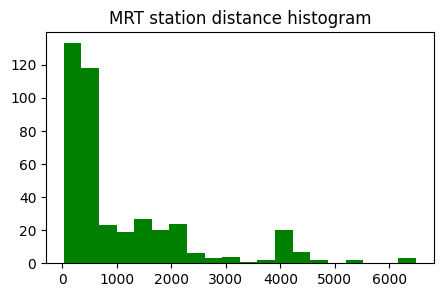

In [15]:
plt.figure(figsize=(5,3))
plt.hist(
     df['X3 distance to the nearest MRT station'],
     bins=20,color='green'
)
plt.title("MRT station distance histogram")
plt.show()

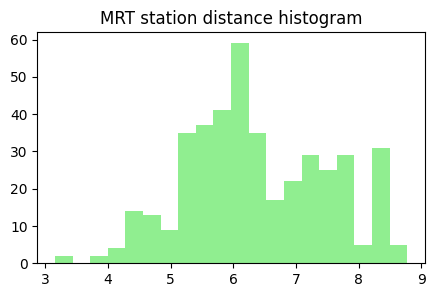

In [16]:
plt.figure(figsize=(5,3))
plt.hist(
     df['X3 distance to the nearest MRT station'].apply(np.log),
     bins=20,color='lightgreen'
)
plt.title("MRT station distance histogram")
plt.show()

In [17]:
df['X3 distance to the nearest MRT station']=(df['X3 distance to the nearest MRT station'].apply(np.log)
)



In [18]:
df['X3 distance to the nearest MRT station'].head(3)

0    4.441225
1    5.725527
2    6.331474
Name: X3 distance to the nearest MRT station, dtype: float64

In [19]:
x = df.drop(['Y house price of unit area'],axis=1)
y=df['Y house price of unit area']

> ### Train-test split

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_model=LinearRegression()



In [24]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [25]:
predictions=lr_model.predict(x_test)

In [26]:
d={
    'ground_truth':y_test,
    'predictions':predictions
}
pd.DataFrame(d)

,ground_truth,predictions
358,45.1,49.544258
350,42.3,39.744747
373,52.2,48.284931
399,37.3,48.132716
369,22.8,26.685721
...,...,...
31,25.0,38.564737
283,23.5,30.552895
157,35.6,39.209033
203,46.1,47.639877


> ### MAE, MSE, RMSE

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,predictions) # root mean squared error


7.097384464798103

In [29]:
predictions_tree=tree_model.predict(x_test)
root_mean_squared_error(y_test,predictions_tree) # root mean squared error

7.925678869482959

In [30]:
l=[1,2,3]
[ele+1 for ele in l]

[2, 3, 4]

In [31]:
import numpy as np
import pandas as pd


#### Scratch impl

In [32]:
import lr 

In [33]:
custom_lr_model=lr.CustomLinearRegression()

In [34]:
x_train.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [35]:
custom_lr_model.fit(
    x_train[['X2 house age','X3 distance to the nearest MRT station']],
    y_train
)

In [36]:
custom_lr_model.w1 , custom_lr_model.w2, custom_lr_model.b

(np.float64(-0.6200223917887839),
 np.float64(0.387093665411854),
 np.float64(0.7389658854505785))

In [37]:
_predictions = custom_lr_model.predict(
    x_test[['X2 house age','X3 distance to the nearest MRT station']]
)

In [38]:
custom_lr_model.loss_mse(y_test,_predictions)

np.float64(2232.9179768632694)

In [39]:
custom_lr_model.fit(x_train[['X2 house age','X3 distance to the nearest MRT station']],y_train)

In [40]:
x_train.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
192,43.8,4.053339,7,24.96750,121.54069
234,8.0,7.703735,4,24.96007,121.51361
5,7.1,7.684798,3,24.96305,121.51254
45,36.6,6.191993,8,24.97015,121.54494
245,7.5,6.460874,5,24.97258,121.54814


In [41]:
x_train.to_numpy()

array([[ 43.8       ,   4.05333939,   7.        ,  24.9675    ,
        121.54069   ],
       [  8.        ,   7.70373518,   4.        ,  24.96007   ,
        121.51361   ],
       [  7.1       ,   7.68479774,   3.        ,  24.96305   ,
        121.51254   ],
       ...,
       [ 10.8       ,   5.53173674,   1.        ,  24.9746    ,
        121.53046   ],
       [  4.6       ,   5.55937578,   6.        ,  24.97585   ,
        121.54516   ],
       [  1.1       ,   5.26571411,   6.        ,  24.96571   ,
        121.54089   ]], shape=(331, 5))

In [42]:
x_train.shape

(331, 5)

In [43]:
np.random.random(5)

array([0.45807443, 0.15942905, 0.40895293, 0.8091201 , 0.53847163])

In [44]:
a = np.array([
    [1,2,3],
    [1,2,3],
    [1,2,3]
])

In [45]:
custom_lr_model2=lr.CustomLinearRegression2(alpha = 0.01, epoch=1000)
custom_lr_model2.fit(x_train, y_train)    

c:\Users\LENOVO\Desktop\python file\pranawa\lr.py:77: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.alpha * grad_w


In [46]:
_predictions2 = custom_lr_model2.predict(x_test)


In [47]:
_predictions2

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [48]:
root_mean_squared_error(y_test, _predictions2) # root mean squared error


ValueError: Input contains NaN.